In [1]:
import json
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

In [10]:
def sin_func(x, a, b):
    d = 0.000000001
    return a + b * np.sin(x*d)

def line_func(x, a, b):
    return a*x+b

def get_data():
    base_url = "http://iss.moex.com/iss/history/engines/stock/markets/shares/boards/TQBR/securities.json"
    response = requests.get(base_url)
    result = json.loads(response.text)
    col_name = result['history']['columns']
    data_shares = pd.DataFrame(columns=col_name)

    url_share = 'http://iss.moex.com/iss/history/engines/stock/markets/shares/boards/TQBR/securities/SBER.json'
    response = requests.get(url_share)
    result = json.loads(response.text)
    resp_date = result['history']['data']
    data_shares = pd.DataFrame(resp_date, columns=col_name)
    a = len(resp_date)

    b = 100
    while a == 100:
        url_opt = '?start=' + str(b)
        url_next_page = url_share + url_opt
        response = requests.get(url_next_page)
        result = json.loads(response.text)
        resp_date = result['history']['data']
        data_next_page = pd.DataFrame(resp_date, columns=col_name)
        data_shares = pd.concat([data_shares, data_next_page], ignore_index=True)
        a = len(resp_date)
        b = b + 100
    return data_shares

def show_plot(x1, y1, label_1, x2, y2, label_2):
    fig, axs = plt.subplots(1, 1, figsize=(5, 4))
    plt.plot(x1, y1, label=label_1)
    plt.plot(x2, y2, label=label_2)
    plt.legend()
    plt.xlabel('Date')
    plt.ylabel('Open');

def line_sin_predict(size, x, y, curve_type = 'line'):
    # return 1 if func is increasing and 0 if func is decreasing
    x_sized = x[-size:]
    y_sized = y[-size:]
    if curve_type == 'line':
        params, cov = curve_fit(line_func, x_sized, y_sized)
        y_predict = [line_func(x_sized[i], *params) for i in range(len(x_sized))]
    else:
        params, cov = curve_fit(sin_func, x_sized, y_sized)
        y_predict = [sin_func(x_sized[i], *params) for i in range(len(x_sized))]
    show_plot(x_sized, y_sized, 'origin', x_sized, y_predict, 'predict')
    if y_predict[-1]>y_predict[-2]:
        return 1
    else:
        return 0
    
def get_prediction():
    data_shares = get_data()
    time_and_open_df = data_shares[['TRADEDATE', 'OPEN']]
    time_and_open_df = time_and_open_df.dropna()
    time_and_open_df['TRADEDATE'] = time_and_open_df['TRADEDATE'].astype("datetime64[ns]")
    time_and_open_df['TRADEDATE'] = time_and_open_df['TRADEDATE'].values.astype("float64")

    x = time_and_open_df['TRADEDATE'].to_list()
    y = time_and_open_df['OPEN'].to_list()
    
    short_predict = line_sin_predict(10, x, y, curve_type='line')
    middle_predict = line_sin_predict(20, x, y, curve_type='sin')
    long_predict = line_sin_predict(0, x, y, curve_type='line')
    print(short_predict, middle_predict, long_predict)
    
    return short_predict, middle_predict, long_predict

/tmp/ipykernel_207403/3812431436.py:30: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data_shares = pd.concat([data_shares, data_next_page], ignore_index=True)


0 0 1


/tmp/ipykernel_207403/3812431436.py:30: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data_shares = pd.concat([data_shares, data_next_page], ignore_index=True)


(0, 0, 1)

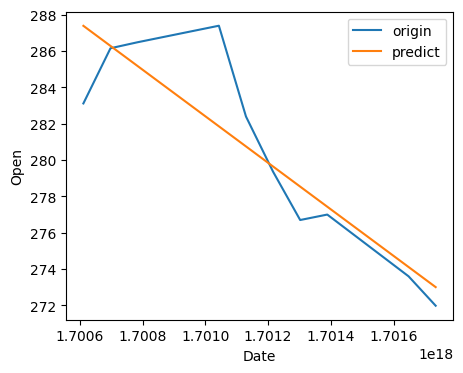

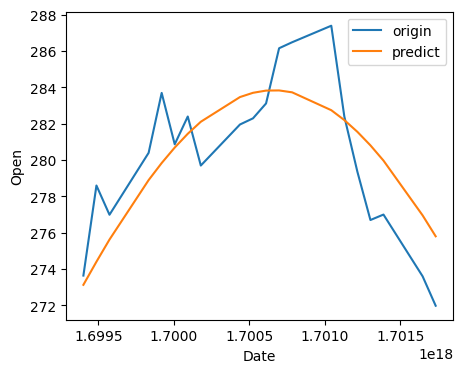

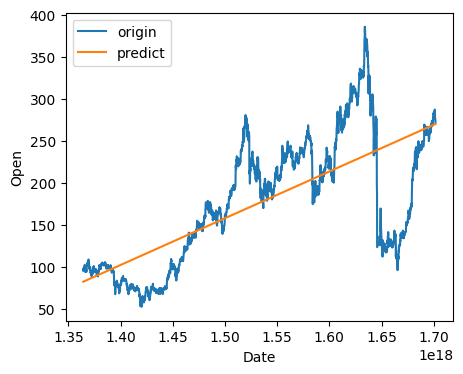

In [11]:
get_prediction()
